In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="darkgrid")# "whitegrid")
%matplotlib inline 
# use this command so that your plots appear inline in your notebook

In [ ]:
from platform import python_version
print("python",python_version())
print('\n'.join(f'{m._name_} {m._version_}' for m in globals().values() if getattr(m, '_version_', None)))

python 3.7.12



In [7]:
## Lets First Load the Dataset
df_train = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Titanic/titanic_train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
## Use PassengerId as Index
df_train = df_train.set_index("PassengerId")
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# Setting the x and y
# We have to predict whether the passenger survived or not so our target(Output) variables will be "Survived"
# and remaining columns will be Predictors(Input variables)
y = targets = labels = output_var = df_train["Survived"]
x = predictors = input_var = df_train.loc[:,df_train.columns != "Survived"]

In [12]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [13]:
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# Print the Target and Input variables
print("Input Variables", list(x.columns))
print("Output Variables", "['Survived']")

Input Variables ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Output Variables ['Survived']


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [19]:
datatype = df_train.dtypes
#col = datatype[(datatype == 'onject') / (datatype == 'int64') / (datatype == 'float64')].index.tolist()
num_col = datatype [(datatype == 'float64') | (datatype == 'int64')].index.tolist()
cat_col = datatype[(datatype == 'object')].index.tolist()
print("Categorical Columns :",cat_col)
print("Numerical Columns :",num_col)

Categorical Columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Columns : ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [23]:
# Run descriptive statistics of numerical datatypes.
df_train.describe(include = ['float64','int64'])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
# Lets Analysis the Target Variables "Survived"
# Calculate the percentage of people who Survived and not Survived
df_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [25]:
per_sur_nonsur = (df_train["Survived"].value_counts()/df_train.shape[0]*100).round(2)
per_sur_nonsur
# 0 > not-Survived
# 1 > Survived

0    61.62
1    38.38
Name: Survived, dtype: float64

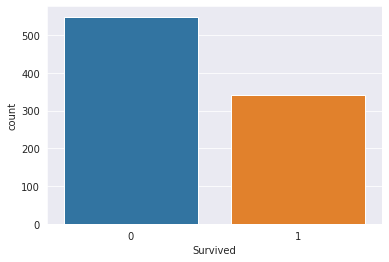

In [45]:
# Lets plot the graph who are survived and not survived as per the Columns data
sns.countplot(data = df_train,x ="Survived")

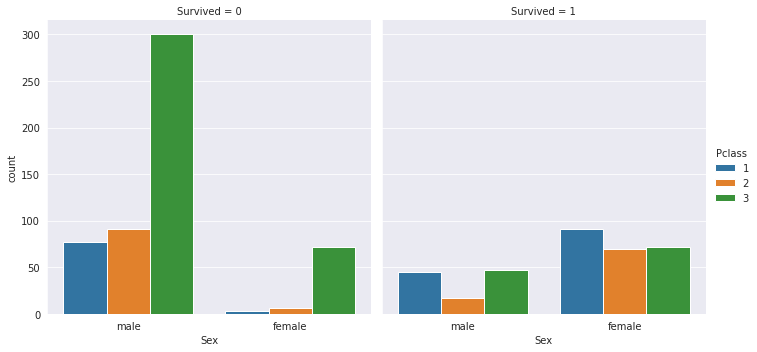

In [46]:
# Lets more elaborate survived data with Pclass and sex and we will use catplot
sns.catplot(data=df_train,col = "Survived",x = "Sex", hue="Pclass",kind = "count")

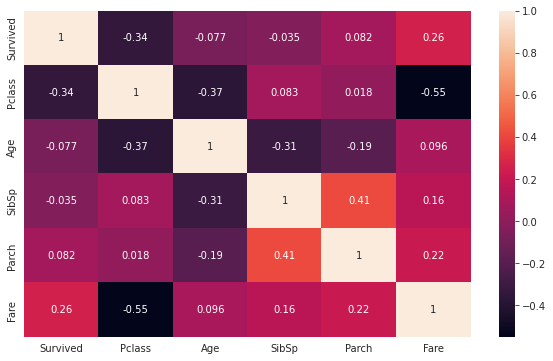

In [47]:
## Co-relation matrix
fig,ax = plt.subplots(figsize = (10,6))
corr = df_train.corr()
sns.heatmap(corr,annot=True)

In [48]:
# If you use the method sum() along with it, then it will return the total number of the duplicates in the dataset
df_train.duplicated().sum()

0

In [51]:
# lets find out the percentage of misssing value in each column
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
missing_value_df = pd.DataFrame({'column_name': df_train.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
Age,Age,0.000000
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Ticket,Ticket,0.000000
Fare,Fare,0.000000
Cabin,Cabin,77.104377


In [50]:
# Impute missing age with median
df_train['Age'].fillna(df_train['Age'].mean(), inplace = True)

In [49]:
# lets find out the percentage of misssing value in each column
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
missing_value_df = pd.DataFrame({'column_name': df_train.columns,
                                 'percent_missing': percent_missing})
missing_value_df



,column_name,percent_missing
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
Age,Age,19.865320
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Ticket,Ticket,0.000000
Fare,Fare,0.000000
Cabin,Cabin,77.104377
